In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras import backend as K

In [2]:
data = pd.read_csv('datasets/ecg_autoencoder_dataset.csv',header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [12]:
features = data.drop(140, axis=1)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [4]:
target = data[140]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 140, dtype: int64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target)

train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [6]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [8]:
class Autoencoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation="relu"),
            Dropout(0.1),
            Dense(32, activation="relu"),
            Dropout(0.1),
            Dense(16, activation="relu"),
            Dropout(0.1),
            Dense(ldim, activation="relu")
        ])

        self.decoder = Sequential([
            Dense(16, activation="relu"),
            Dropout(0.1),
            Dense(32, activation="relu"),
            Dropout(0.1),
            Dense(64, activation="relu"),
            Dropout(0.1),
            Dense(output_units, activation="sigmoid")
        ])

    # The call method should be indented at the same level as __init__
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [30]:
#Compile code

In [32]:
model = Autoencoder(output_units=x_train_scaled.shape[1])

model.compile(loss="msle", optimizer="adam", metrics=['mse'])
epochs=20

model.summary()

Model: "autoencoder_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
h = model.fit(x_train_scaled, x_train_scaled, epochs=epochs, batch_size=512, validation_data=(x_test_scaled, x_test_scaled))
     

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - loss: 0.0119 - mse: 0.0271 - val_loss: 0.0147 - val_mse: 0.0349
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0115 - mse: 0.0262 - val_loss: 0.0145 - val_mse: 0.0344
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0111 - mse: 0.0251 - val_loss: 0.0141 - val_mse: 0.0335
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0097 - mse: 0.0221 - val_loss: 0.0140 - val_mse: 0.0331
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0084 - mse: 0.0191 - val_loss: 0.0145 - val_mse: 0.0341
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0073 - mse: 0.0164 - val_loss: 0.0134 - val_mse: 0.0317
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0064 - mse: 0.0144 - val_loss: 0.0129 - val_mse: 0.0303
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0055 - mse: 0.0125 - val_loss: 0.0121 - val_mse: 0.0287
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0050 - mse: 0.0113 -

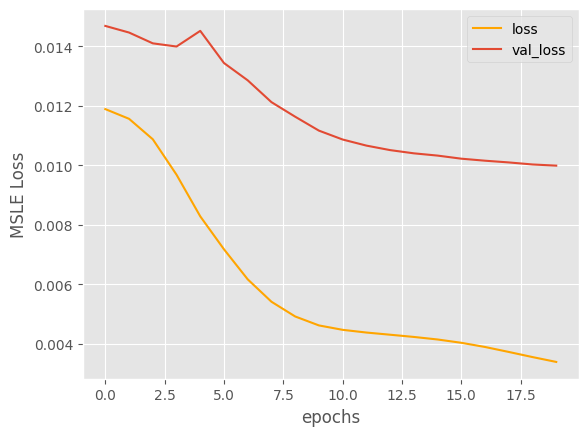

In [34]:
plt.plot(h.history['loss'], label="loss", color="orange")
plt.plot(h.history['val_loss'], label="val_loss")
plt.ylabel("MSLE Loss")
plt.xlabel("epochs")
plt.legend()

In [35]:
def find_threshold(model, x_train_scaled):
  reconstruction = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstruction, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
  return threshold

In [36]:
def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x:0.0 if x == True else 1.0)
  return preds

In [37]:
threshold = find_threshold(model, x_train_scaled)
print(threshold)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
0.007652615511409593


In [38]:
prediction = get_predictions(model, x_test_scaled, threshold)
accuracy_score(prediction, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.947

In [45]:
# Cell 7 - Evaluate on test set
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

y_pred = get_predictions(model, x_test_scaled, threshold)

# Step 2: compute reconstruction errors separately (for ROC-AUC)
reconstruction = model.predict(x_test_scaled)
errors = tf.keras.losses.msle(reconstruction, x_test_scaled).numpy()

# Step 3: evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC (using raw errors):", roc_auc_score(y_test, errors))
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.947
ROC AUC (using raw errors): 0.025507935985247625

Classification report:
              precision    recall  f1-score   support

           0     0.8903    0.9952    0.9398       416
           1     0.9963    0.9127    0.9526       584

    accuracy                         0.9470      1000
   macro avg     0.9433    0.9539    0.9462      1000
weighted avg     0.9522    0.9470    0.9473      1000

Confusion matrix:
 [[414   2]
 [ 51 533]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Sample 1  MSE_recon=0.004714


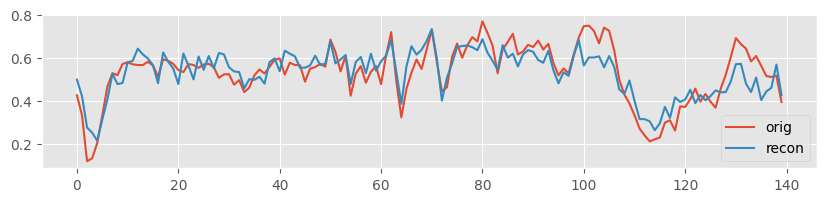

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Sample 2  MSE_recon=0.002681


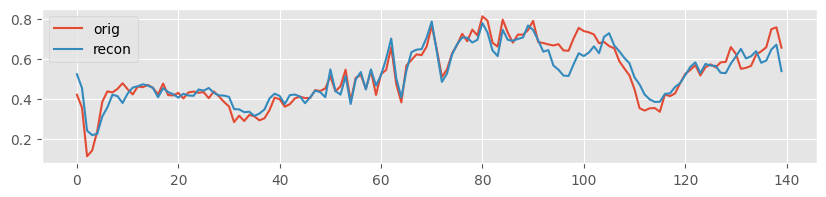

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Sample 3  MSE_recon=0.002686


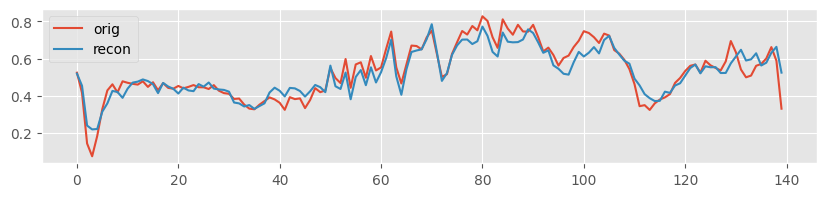

In [41]:
# Cell 9 - Optional: show a few sample reconstructions (scaled values)
idxs = np.where(y_test==1)[0][:3]  # first 3 frauds
for i in idxs:
    orig = x_test_scaled[i]
    rec  = model.predict(orig.reshape(1,-1))[0]
    print(f"Sample {i}  MSE_recon={np.mean((orig-rec)**2):.6f}")
    plt.figure(figsize=(10,2)); plt.plot(orig, label="orig"); plt.plot(rec, label="recon"); plt.legend(); plt.show()
